In [3]:
%matplotlib inline
import numpy as np
from scipy.misc import derivative
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

## HW 3 problem 9

In [4]:
primative = lambda x: x**2 + 1
xSet = lambda x: ((x - 2) * (x - 4)) <= 0
xRange = np.r_[-1:5:1e2j]

pUnc = primative(xRange)
pCon = xSet(xRange)
p = np.inf * np.ones(xRange.shape)
p[pCon] = pUnc[pCon]
pStar = np.min(p)

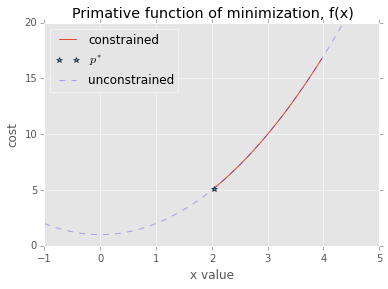

In [5]:
_ = plt.plot(xRange, p, label = 'constrained')
_ = plt.xlim(np.min(xRange), np.max(xRange))
_ = plt.plot(xRange[p==pStar], pStar, '*', label = r'$p^*$')
_ = plt.plot(xRange, pUnc, '--b', alpha=0.3, label = 'unconstrained')
_ = plt.xlim(-1, 5)
_ = plt.ylim(0, 20)
_ = plt.xlabel('x value')
_ = plt.ylabel('cost')
_ = plt.legend(loc=2)
_ = plt.title('Primative function of minimization, f(x)')

In [6]:
# part b
# Lagrangian function
Lagrange = lambda x, lam: x ** 2 + 1 + lam * (x - 2) * (x - 4)
lamRange = np.r_[0:20:1e2j]
lagrangeResult = np.array([Lagrange(xRange, l) for l in lamRange])
X, L = np.meshgrid(xRange, lamRange)

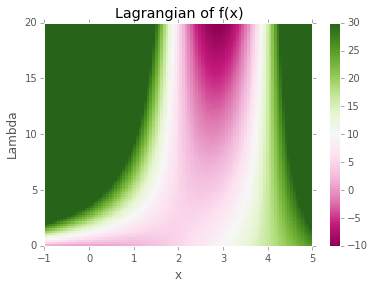

In [7]:
_ = plt.pcolormesh(X, L, lagrangeResult, cmap=plt.get_cmap('PiYG'))
_ = plt.clim(-10, 30)
_ = plt.colorbar()
_ = plt.ylabel('Lambda')
_ = plt.xlabel('x')
_ = plt.title('Lagrangian of f(x)')

In [8]:
dual = lambda l: Lagrange((3 * l) / (1 + l), l)
dual2 = lambda l: (-l**3 + 8 * l ** 2 + 10 * l + 1) / (1 + l) ** 2

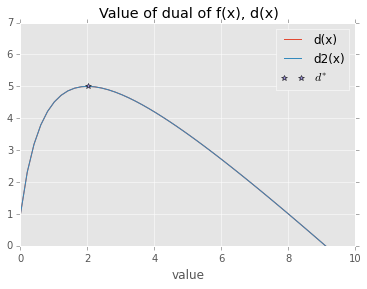

In [9]:
_ = plt.plot(lamRange, dual(lamRange), label='d(x)')
_ = plt.plot(lamRange, dual2(lamRange), label='d2(x)')

_ = plt.plot(lamRange[np.argmax(dual(lamRange))],\
             np.max(dual(lamRange)), '*', label=r'$d^*$')

_ = plt.ylim()
_ = plt.xlim(0, 10)
_ = plt.ylim(0, 7)
_ = plt.xlabel(r'$\lambda$')
_ = plt.xlabel('value')
_ = plt.title('Value of dual of f(x), d(x)')
_ = plt.legend()

In [10]:
# Sensitivity analysis
xRange2 = np.r_[-4:4:1e4j]
uRange = np.r_[-.99:10:1e3j]

pUnc2 = primative(xRange2)

xSet_preturberd = lambda x, u: ((x - 2) * (x - 4)) <= u
pMin_u = lambda u, x: np.min(primative(x)[xSet_preturberd(x, u)])

pS_preturbed = np.array([pMin_u(u, xRange2) for u in uRange])
dp_du = derivative(pMin_u, 0, dx = 0.1, args = (xRange2,))

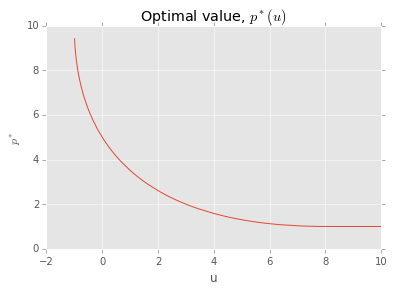

In [11]:
_ = plt.plot(uRange, pS_preturbed)
_ = plt.ylim(0, 10)
_ = plt.xlim(-2, 10)
_ = plt.xlabel('u')
_ = plt.ylabel(r'$p^*$')
_ = plt.title(r'Optimal value, $p^*(u)$')

In [12]:
print('derivative dp/du at u = 0 is %0.2f' %dp_du)

derivative dp/du at u = 0 is -2.00
